In [1]:
%matplotlib inline
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

<h1 align="center">
	Larmor Precession On A Quantum Computer Simulator
</h1>

I used QISKit provided local backend "Qasm Simulator" for the simulator type.

* What you will be learning:

1- The behavior of a spin 1/2 particle subjected to an external magnetic field.

2- the Larmor Precession quantum phenomenon.

3- How a quantum computer can simulate this natural phenomenon.

4- How to implement a Hamiltonian's time evolution on a Quantum circuit.

## - Larmor Precession theory:

The magnetic field, in general, can be pointing in any direction in 3D space $\vec B = B_x \vec i + B_y \vec j + B_z \vec z \;$. Also, the spin 1/2 particle, have a spin angular momentum pointing in the 3D space $\vec S = S_x \vec i + S_y \vec j + S_z \vec z \;$, and since he acts like spinning, he has a magnetic moment $\vec \mu$ .

Suppose an electron $e^-$, with angular momentum $\vec S$, and a magnetic moment $\vec \mu$, exposed to a uniform magnetic field $\vec B$, in this experiment we will consider the special case where $\vec B$ point in the z-direction, thus $\vec B = B \vec z$, fig_1.
<img src="Precession-cones.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad figure1:\; Magnetic\; moment\; of\; an\; electron\; in\; a\; magnetic\; field\; \vec{B}.$[[4](https://www.researchgate.net/publication/321878551_Hyperpolarized_Long-Lived_States_in_Monodeuterated_Methyl_Groups_Singlet-Scalar_Relaxation_in_the_Regime_of_Slow_Quadrupolar_Relaxation/citations)]

To see how the spin 1/2 interact with $\vec B\;$, we need to find the Hamiltonian $H$ of the system:
* Since the $e^-$ is at rest, the kinetic energy part of $H$ will be equal to zero, therefore he will be given by the potential energy, which is:
$$H = V = -\vec \mu \cdot \vec B$$
* We are interested in the evolution of the orientation of the electron spin; therefore $H$ must be expressed in term of the spin rather than the magnetic moment, given that $\vec \mu = -\gamma \vec S$ , $\gamma \;is\;the\;gyromagnetic\;ratio$ , hence:
$$H = -\gamma \vec S \cdot \vec B$$
the spin observable in the z-direction is: $S_z = \frac{\hbar}{2} \sigma_z$ , $\sigma_z :\;is\;the\;Pauli's\;matrix$.

$\Rightarrow$ $$\begin{align*}
H&=-\gamma B S_z \\
&=- \frac{\gamma \hbar B}{2} \sigma_z \\
&=- \frac{\gamma \hbar B}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
\end{align*}$$
* This Hamiltonian is proportional to $S_z$, consequently, he commutes with $S_z$, $[S_z, S_z]=0$ and $S^2$, $[S_z, S^2]=0$, then the eigenstates of $H$ are the ones of $S_z$:

$\Rightarrow$ $$\begin{align*}
H \left| \uparrow \right\rangle& = E_-\left| \uparrow \right\rangle =- \frac{\gamma \hbar B}{2}\left| \uparrow \right\rangle\\
H \left| \downarrow \right\rangle&= E_+\left| \downarrow \right\rangle = \frac{\gamma \hbar B}{2}\left| \downarrow \right\rangle
\end{align*}$$

The lowest eigenvalue is associated with spin up, that is a parallel alignment with the field.
* To see how the electron behaves under this Hamiltonian, we need to solve the Schrodinger equation:

$$ i \hbar \partial_t \left| \psi(t) \right\rangle = H \left| \psi(t) \right\rangle \qquad (1)$$

To do that, first of all, we need to set up (or choose) our initial state vector of the $e^-$ at $t=0$. In general, any state (or qubit) can be expressed in the Bloch sphere fig_2 as:

$$ \left| \psi \right\rangle = \cos(\frac{\theta}{2}) \left| \uparrow \right\rangle + e^{i\phi} \sin(\frac{\theta}{2}) \left| \downarrow \right\rangle$$

<img src="wiki_Bloch_Sphere.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure2:\;Bloch\; Sphere.\;(image\;credit: wikipedia)$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\; \left| 0 \right\rangle$ and $\left| 1 \right\rangle$ being $\left| \uparrow \right\rangle$ and $\left| \downarrow \right\rangle$ respectively.

Back to $(1)$, $H$ is time-independent, thus the general solution to the time-dependent Schrodinger equation is:
$$ \left| \psi(t) \right\rangle = U(t) \left| \psi(0) \right\rangle$$

where the time evolution operator is $ U(t) = \sum_{i}^{} e^\frac{-i E_i t}{2} \left| E_i \right\rangle \left\langle E_i \right| \;$, $\qquad \left| E_i \right\rangle$ are $\left| \uparrow \right\rangle\; or\; \left| \downarrow \right\rangle$, it follows that:

$\Rightarrow$ $$\left| \psi(t) \right\rangle = e^{i\frac{\gamma B}{2}t} \cos(\frac{\theta}{2})\left| \uparrow \right\rangle + e^{-i\frac{\gamma B}{2}t} e^{i\phi} \sin(\frac{\theta}{2})\left| \downarrow \right\rangle$$

To recognize the resulting state, it is convenient to factor out the phase that multiply the $\left| \uparrow \right\rangle$ state:
$$\left| \psi(t) \right\rangle = e^{i\frac{\gamma B}{2}t} (\cos(\frac{\theta}{2})\left| \uparrow \right\rangle + e^{i(\phi - \gamma B t)} \sin(\frac{\theta}{2})\left| \downarrow \right\rangle)$$

By ignoring the overall phase $e^{i\frac{\gamma B}{2}t}$, we can recognize the spin state through the angles:
$$\begin{align*}
\theta (t)&= \theta\\
\phi (t)&= \phi - \gamma B t
\end{align*}$$

$\rightarrow\;$ As we can see the angle $\phi$ change as a function of time, while $\theta$ remains constant in time, therefore the presence of a uniform magnetic field B, leads the $e^-$ spin to start precessing around the z-axis! This is called the **Larmor Precession**, fig_1 shows the precession of different angle $\theta$. Also, it precess at a certain rate $\omega = - \gamma B$, this is called the **Larmor Frequency**.

* Let us now get the expression for the time evolution of the x, y, z-axis components of the spin angular momentum fig_3b: $\left\langle S_x \right\rangle$?, $\left\langle S_y \right\rangle$?,$\left\langle S_z \right\rangle$?

We end up with: $\left| \psi(t) \right\rangle = \cos(\frac{\theta}{2})\left| \uparrow \right\rangle +  e^{i \omega t} \sin(\frac{\theta}{2})\left| \downarrow \right\rangle = \begin{pmatrix} \cos(\frac{\theta}{2}) \\ e^{i \omega t} \sin(\frac{\theta}{2}) \end{pmatrix} \;$, so:

$$\left\langle S_z \right\rangle = \left\langle \psi \right| S_z \left| \psi \right\rangle = \frac{\hbar}{2} \left( \cos(\frac{\theta}{2}) \;\;\;\;  e^{-i \omega t} \sin(\frac{\theta}{2}) \right) \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} \cos(\frac{\theta}{2}) \\ e^{i \omega t} \sin(\frac{\theta}{2}) \end{pmatrix} = \frac{\hbar}{2} \cos(\theta)$$

$\rightarrow\;$ This expectation value is time-independent, this is trivial since $\theta = cst$, hence the projection of $\vec{S}$ along the z-axis still unchangeable, see fig_3a [[1](http://depts.washington.edu/jrphys/ph315W08/spinmag.pdf)] and fig_3b.

By identical calculation for $\left\langle S_x \right\rangle$ and $\left\langle S_y \right\rangle$, we obtain:
$$\begin{align*}
\left\langle S_y \right\rangle&= \frac{\hbar}{2} \sin(\theta) \cos(\phi + \omega t)\\
\left\langle S_x \right\rangle&= \frac{\hbar}{2} \sin(\theta) \sin(\phi + \omega t)
\end{align*}$$
$\rightarrow\;$The difference between the two is just a rotation in the (x,y) plane, and they are both oscillating in time.

**These equations define a vector that points towards a circle of radius $\frac{\hbar}{2} \sin(\theta)\;$ and goes around the circle with frequency $\omega =\left\lvert{\gamma}\right\rvert B\;$,  [[3](https://www.reed.edu/physics/courses/Physics342/html/page2/files/Lecture.26.pdf)] , fig_3a** 

<img src="expec.precession.png" alt="drawing" width="300" align="center"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure3a:\;Expectation\;value\;evolution\;of\;the\;angular\;momentum.$
<img src="expecxyz.png" alt="drawing" width="300" align="center"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure3b:\;Expectation\;value.$

$\Rightarrow$ To sum up, electrons have a property called "spin" which results in an angular momentum. Since the electron is charged, a magnetic moment is associated with the angular momentum that points in the opposite direction to the angular momentum vector $\vec \mu = -\gamma \vec S$ . In an external magnetic field, the spin precesses at the Larmor frequency along the field direction and thus a component of the magnetic moment is either parallel or anti-parallel to the field direction.

## -Larmor precession on a QC; experiment:

**To visualize how this expectation value varies, let us simulate this phenomenon on a quantum computer simulator $-$ a simulated runs of real quantum computers, represent the same operations performed without decoherence or errors.**

* Define the universal gates:

The relevant single-qubit operations implementable by the IBM quantum computer are:

$$
U_1(\lambda) = \begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
\qquad
U_2(\lambda , \phi) =\frac{1}{\sqrt2} \begin{pmatrix}
1 & -e^{i \lambda}\\
e^{i \phi} & e^{i (\lambda + \phi)}
\end{pmatrix},
\qquad
U_3(\theta,\phi,\lambda) = \begin{pmatrix}
\cos(\frac{\theta}{2}) & -e^{i \lambda} \sin(\frac{\theta}{2})\\
e^{i \phi} \sin(\frac{\theta}{2}) & e^{i (\lambda + \phi)} \cos(\frac{\theta}{2})
\end{pmatrix}.
$$

where $\lambda$, $\phi$ and $\theta$ are free real parameters that can be adjusted in accordance with the gate to be implemented [[2](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf)]

The initial state $\left| \psi(0) \right\rangle$ can be prepared using the unitary $U_3(\theta) = \begin{pmatrix} \cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2}) \end{pmatrix}$ acting on $\left| 0 \right\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

***1-*** Let's start by preparing our qubit with the state $\left| \psi(0) \right\rangle$  by performing a rotation of $\frac{\pi}{4}$ around the $Y$-axis$-$this is implemented by the $R_y(\frac{\pi}{4}) $ gate in the code below. fig_4

<img src="pi4.bloch.sphere.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure4:\;\pi /4\;state.$

***2-*** Implement the time evolution operator: the evolution of this state under a magnetic field $B$ is guaranteed by the evolution operator $U(t)= e^{i \frac{\omega t}{2}\sigma_z}$, this can be implemented in the quantum circuit through the $R_z(\lambda)$ gate (or the $U_1(\lambda)$ gate), setting $\lambda = \omega t\;$ fig_5, **this gate enable us to simulate the application of the uniform magnetic field, so according to $R_z(\lambda)$ the field perform a rotation around the z-axis by a variable angle $\omega t$ in the Bloch sphere**.

The measurements of the expectation values are done on the x-, y-, z-axis to measure $\left\langle S_x \right\rangle$, $\left\langle S_y \right\rangle$,$\left\langle S_z \right\rangle$ respectively, however quantum computers are restricted only to measure on the computational basis $\left| 0 \right\rangle \equiv \left| \uparrow \right\rangle$ and $\left| 1 \right\rangle \equiv \left| \downarrow \right\rangle$, so we need to follow some steps to measure our quantities safely, **see a detailed explanation [here](https://github.com/walid-mk/VQE/blob/master/Task4/VQE.Noiseless.Simulator.Code1.ipynb).**

***3-*** The measurement: to measure the z-spin component we don't need to implement a rotation. On the other hand, the spin measurement along x-axis we apply a Hadamard gate $H$, and for the y-axis we apply a rotation around the x-axis in the Bloch sphere $R_x(\pi/2$), see the operators in fig_5 [[2](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf)]

<img src="measurement.png" alt="drawing" width="300"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure5:Initialization+\;Evolution+\;Measurement$

$\rightarrow\;$ The encircled part in fig_5 represents a measurement on the computational basis $\{|1\rangle, |0\rangle\}$ and provides probabilities {$P_0^{x,y,z}, P_1^{x,y,z}$} of finding the states $\left| 0 \right\rangle$ and $\left| 1 \right\rangle$ along the x-,y-,z-axis. Therefore the expectation values can be computed as:
$$\left\langle S_{x,y,z} \right\rangle = \frac{\hbar}{2} [P_0^{x,y,z}(\omega t) - P_1^{x,y,z}(\omega t)]$$

P.S. 
$$
H_{gate} = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix},
\qquad
R_{x}(\theta) =\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix},
\qquad
R_{z}(\theta) =\begin{pmatrix}
e^{-i\theta/2} & 0\\
0 & e^{i\theta/2}
\end{pmatrix},
\qquad
R_{y}(\theta) =\begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix}.
$$

In [2]:
# Define a function that we will use to get the probability from the counts returned after execution:
shots = 1000 # the numbers of shots
def get_from(d: dict, key: str):

    value = 0
    if key in d:
        value = d[key]
    return value/shots

In [3]:
def probability(circuit, measure, seed):
    # Initialize lists to extract the added values from the measurement to plot it
    pr_0 = [] # list that will hold results of the probility of getting the state 0 after 1000 shots
    pr_1 = [] # probility of getting the state 1
    expc = [] # the expectation value pr_0 - pr_1
    T = [] # the values of time
    
    # The for function play the role of the time generator:
    for t in range(25):
        q = QuantumRegister(1)
        c = ClassicalRegister(1)
        circuit = QuantumCircuit(q, c) #Create a circuit called 'qc', with 1 qubit, and 1 bit for the output
        
        # Initialization of the state |𝜓⟩ at t=0:
        circuit.ry(np.pi/4,0) # You can also try circuit.h(0) for another intilization.
        
        # This implementation translate the evolution of the system in a magnetic field:
        circuit.rz(t,0) # I ignored the constant 𝜔.
        
        # the measurement process
        if measure == 'Z':
            circuit.measure(q[0], c[0]) # extract a bit from the qubit, and write it to our output bit.
        elif measure == 'X':
            circuit.u(np.pi/2, 0, np.pi, q[0])
            circuit.measure(q[0], c[0])
        elif measure == 'Y':
            circuit.u(np.pi/2, 0, np.pi/2, q[0])
            circuit.measure(q[0], c[0])
    
        simulator = Aer.get_backend('qasm_simulator') # our quantum computer qasm simulator.

        if seed==True:
            job = execute(circuit, backend=simulator, shots=shots, seed_simulator=12345)
        elif seed==False:
            job = execute(circuit, backend=simulator, shots=shots)
        
        result = job.result()
        counts = result.get_counts()
        
        pr_0.append(get_from(counts, '0'))
        pr_1.append(get_from(counts, '1'))
        expc.append(get_from(counts, '0')- get_from(counts, '1')) # pr_0 - pr_1
        T.append(t)
        
    return pr_0, pr_1, expc, T

Remark: Fixing the `seed_simulator` inside the execute function permits us to control sampling and we will have a fixed result of probability after each run (shot), instead of having different ones. Therefore, this helps me to get a classical simulation that I'm going to compare with the quantum simulation. (where the seed_simulator is not fixed).

In [4]:
def smooth_line(axe, seed):
# Using some Matplotlib and Scipy functions to get nice and smooth lines.
    time = np.array(probability(circuit,'Z', seed)[3])
    x_time_smooth = np.linspace(time.min(),time.max(),250)
    spl = make_interp_spline(time, probability(circuit, axe, seed)[2], k=3)
    y_expec_smooth = spl(x_time_smooth)
        
    return x_time_smooth, y_expec_smooth

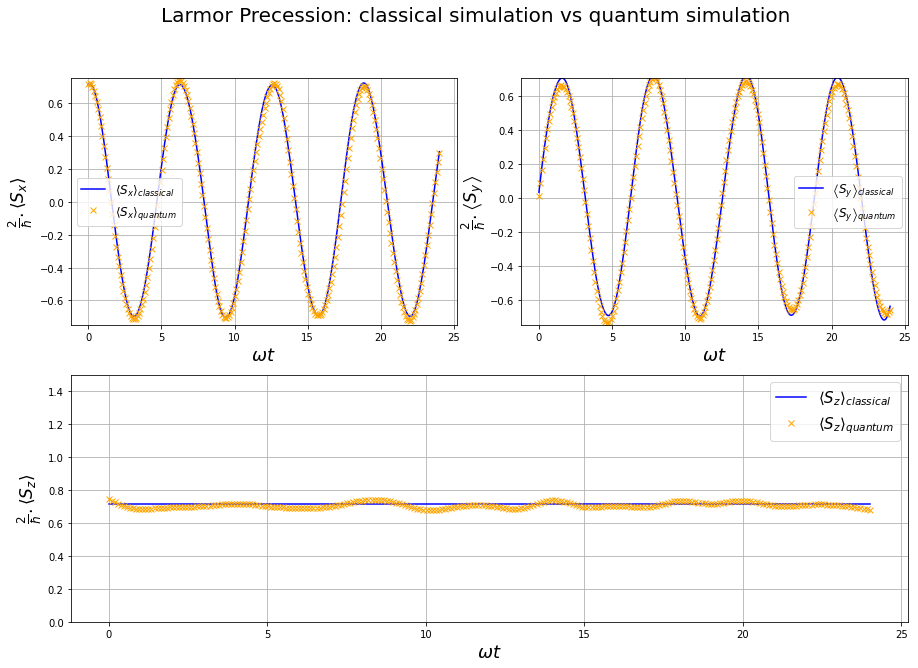

In [13]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(15, 10), gridspec_kw={'wspace': 0.4})
gs = axs[0, 0].get_gridspec()
for ax in axs.ravel():
    ax.remove()
    
fig.suptitle("Larmor Precession: classical simulation vs quantum simulation", fontsize=20)
ax1 = fig.add_subplot(gs[0, :2])
###########################<X>############################
ax1.plot(smooth_line('X', seed=True)[0], smooth_line('X', seed=True)[1]
         , color='blue',linestyle='-', label=r'$\left\langle S_{x} \right\rangle_{classical}\;$')
ax1.plot(smooth_line('X', seed=False)[0], smooth_line('X', seed=False)[1],'x', color='orange'
         , label=r'$\left\langle S_{x} \right\rangle_{quantum}\;$')

ax1.set_xlabel(r'$\omega t$',{'color': 'black', 'fontsize': 18})
ax1.set_ylabel(r'$\frac{2}{\hbar} . \left\langle S_{x} \right\rangle\;$', {'color': 'black', 'fontsize': 17})
ax1.set_ylim(min(smooth_line('X', seed=False)[1]), max(smooth_line('X', seed=False)[1]))
ax1.legend(fontsize=12)
ax1.grid(True)

########################<Y>##############################
ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(smooth_line('Y', seed=True)[0], smooth_line('Y', seed=True)[1]
         , color='blue',linestyle='-', label=r'$\left\langle S_{y} \right\rangle_{classical}\;$')
ax2.plot(smooth_line('Y', seed=False)[0], smooth_line('Y', seed=False)[1],'x', color='orange'
         , label=r'$\left\langle S_{y} \right\rangle_{quantum}\;$')

ax2.set_xlabel(r'$\omega t$',{'color': 'black', 'fontsize': 18})
ax2.set_ylabel(r'$\frac{2}{\hbar} . \left\langle S_{y} \right\rangle\;$', 
               {'color': 'black', 'fontsize': 17}, labelpad=2.3)
ax2.set_ylim(min(smooth_line('Y', seed=False)[1]), max(smooth_line('Y', seed=False)[1]))
ax2.legend(fontsize=12)
ax2.grid(True)

##########################<Z>##################################
ax3 = fig.add_subplot(gs[1, :])

ax3.plot(smooth_line('Z', seed=True)[0], smooth_line('Z', seed=True)[1],'-', color='blue', label=r'$\left\langle S_{z} \right\rangle_{classical}\;$')
ax3.plot(smooth_line('Z', seed=False)[0], smooth_line('Z', seed=False)[1],'x', color='orange', linewidth=20, label=r'$\left\langle S_{z} \right\rangle_{quantum}\;$')

ax3.set_xlabel(r'$\omega t$',
           {'color': 'black', 'fontsize': 18})
ax3.set_ylabel(r'$\frac{2}{\hbar} . \left\langle S_{z} \right\rangle\;$',
           {'color': 'black', 'fontsize': 17})
ax3.set_ylim([0, 1.5])
ax3.legend(fontsize=15)
ax3.grid(True)
plt.show()

**As we can see the $\left\langle S_z \right\rangle$ represents a straight line $-$ a constant value, whereas $\left\langle S_{x,y} \right\rangle$ are oscillating and shifted with a phase which I mentioned above as a rotation.**

The measurement for each value of $\omega t$ was repeated 1000 times, which represents a point in the line.

$\rightarrow\;$ **As you can remark, there is an agreement between the classical simulation ('-' line) and the quantum simulation ('$\times$' line), and the observed fluctuation is due to the uncertain nature of the quantum computer. With that, we succeeded to simulate the Larmor precession using a quantum computer simulator, and showed that quantum computers are reliable in terms of quantum simulation.**

P.S. By looking at the literature, I found this paper [[2](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf)] where they used a real quantum computer, IBM five qubit chip, to run this experiment.

# ----------------------------------------------------------------------
## Optional:
(The following plots are done on the simulator with a fixed `seed_simulator`.)

* To get more intuition about this precession, let's think about how to get the state 0 and 1 while time shifts. To do that, try to visualize how the projection of the state vector $|\psi \rangle$ on the (x,y) plane will vary with time in the Bloch sphere; the precession is along the z-axis, hence the projection on this axe is constant. Whereas the projection on the x-,y-axis will shift in time, therefore it begins with a high probability of being in state 1 and incrementally decreasing allowing for an increase in state 0. fig_6

<img src="projection.bloch.png" alt="drawing" width="400"/>
$\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad figure6:\;Projection\;on\;the\;Bloch\;sphere\;axis.$

**The code below, follow the x-axis projection variance, and you can choose the y- and z-axis to measure and make conclusions:**

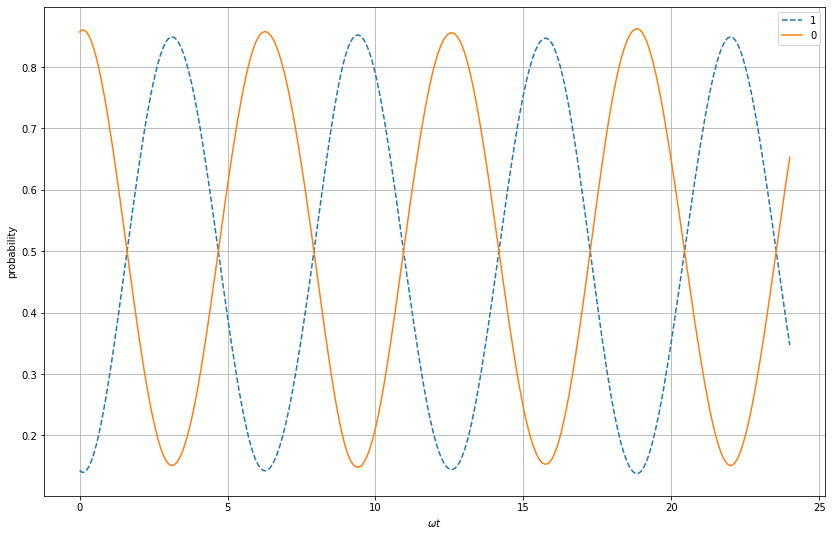

In [11]:
# plotting the probability oscillation along the x-axis
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot()


t = np.array(probability(circuit,'Z', seed=True)[3])
T_smooth = np.linspace(t.min(),t.max(),300)
spl1 = make_interp_spline(t, probability(circuit,'X', seed=True)[0], k=3)
spl2 = make_interp_spline(t, probability(circuit,'X', seed=True)[1], k=3)
proba1_smooth = spl2(T_smooth)
proba0_smooth = spl1(T_smooth)

ax1.plot(T_smooth, proba1_smooth, linestyle='--', label='1')
ax1.plot(T_smooth, proba0_smooth, label='0')

plt.xlabel(r'$\omega t$')
plt.ylabel('probability')
plt.legend()
plt.grid()
plt.show()

$\rightarrow\;$ **As you can see, we achieved what we expected, the probability being in the state $0$ is higher, this is obvious since our state is prepared closer to the $0$ state of the x-axis (at t=0 the projection of $|\psi\rangle$ coincide with the x-axis), and with time, the state vector gradually approach the $1$ state and so on. this alternation in between creates an oscillation as shown above.**


* The preparation of the state is arbitrary, you can choose one by playing with the code, and deduce a conclusion by reading the plot result. For instance, this is another try, by establishing the state on the x-axis by applying a Hadamard gate on $\left| 0 \right\rangle$ state vector, and this what I got:

<img src="hadamard.png" alt="drawing" width="700"/>

* This experiment can also be done with two qubits (think of it as two Bloch sphere in a uniform magnetic field), depending on where you initialize your state you get an oscillation of two-state ($\left| 00 \right\rangle$ and $\left| 11 \right\rangle$, or $\left| 01 \right\rangle$ and $\left| 10 \right\rangle$...), for example, preparing the first qubit with a Hadamard and the second with a Hadamard + Z gate(a $\pi$ rotation around the z-axis) I got an oscillation of the state $\left| 01 \right\rangle$ and $\left| 10 \right\rangle$:

<img src="two.qubits.png" alt="drawing" width="700"/>

<h1 align="center">
	References
</h1>


[1] [Evolution of a spin 1/2 particle in a uniform magnetic field from Cohen-Tannoudji](http://depts.washington.edu/jrphys/ph315W08/spinmag.pdf)

[2] [Émerson M Alves, Francisco D S Gomes et al. Revista Brasileira de Ensino de Física, 42, 2020](http://www.scielo.br/pdf/rbef/v42/1806-9126-RBEF-42-e20190299.pdf).

[3] [Addition of Angular Momentum](https://www.reed.edu/physics/courses/Physics342/html/page2/files/Lecture.26.pdf)

[4] [Stuart J. Elliott 2017 Hyperpolarized Long-Lived States in Monodeuterated Methyl Groups & Singlet-Scalar Relaxation in the Regime of Slow Quadrupolar Relaxation ResearchGate](https://www.researchgate.net/publication/321878551_Hyperpolarized_Long-Lived_States_in_Monodeuterated_Methyl_Groups_Singlet-Scalar_Relaxation_in_the_Regime_of_Slow_Quadrupolar_Relaxation/citations)